# Explosion Intensity from Ruapehu Eruptions - Comparison with 2007 Eruption

## Introduction
How do we express the size of an eruption from Ruapehu in the hours to days after the eruption? Measures such as VEI or Magnitude cannot be determined without some analysis, so are not available promptly. In this situation, how do we convey the eruption size to stakeholders in a way that is backed by data and does not rely on impacts, which can be influenced by a range of external factors?

One option is to use the amplitude of the acoustic (infrasound/airwave) signal, a measure of the intensity of an explosion, as is commonly used at some volcanoes, e.g. Sakurajima. Even if we do that, the units of air pressure (hectopascals, hPa) are not something non-specialists can easily relate to.

One option is to compare the acoustic signal amplitude to that of a past eruption of the same volcano (measured at the same observation point). This should give stakeholders at least some idea of size, although it will remain difficult explaining that explosion intensity does not imply anything about lahar impacts or ash distribution.

## Objective
To calculate the intensity of a Ruapehu eruption relative to that of the eruption of 25 September 2007, the only past eruption for which we have digital acoustic data. This is done using the acoustic sensor at the Chateau Observatory (COVZ), as that was the only sensor that recorded the 2007 eruption. The stream name for these data is COVZ.30.HDF.NZ.

## Inputs
The user needs to input the date and time (in UTC) of the arrival of the acoustic wave at COVZ. This can be measured using a tool such as Swarm, or can be roughly calculated by adding 27 seconds to the eruption time. The arrival time of the acoustic wave needs to be specified to within a few seconds. It is possible to input an estimate of the arrival time and view the results and then adjust the estimate. The intention is that the acoustic waves for the 2007 eruption and the new eruption 'line up' in the visualisation to permit easy comparison.

The user also needs to input the amount to waveform to show before and after acoustic arrival time, this is specified in seconds. This is simply to ensure that the visualisation looks 'nice', should the user want to use that to show stakeholders

## Notebook
### Author
Steven Sherburn
### Date
June 2018
### GitHub
hdjwhdwdklwdkd

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
#import modules
from obspy.core import read, Trace, Stream, UTCDateTime
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

%matplotlib inline

In [5]:
style.use('fivethirtyeight')

In [6]:
#GeoNet's FDSN web servers
arc_client = 'http://service.geonet.org.nz'
nrt_client = 'http://beta-service-nrt.geonet.org.nz'

In [7]:
#function to get a stream from an FDSN client
#there is an issue with FDSN not returning the same time length for each date-time, although it should return more than is requested
#this is circumvented by requesting twice what is needed, and then trimming the resulting trace

def getwave(date, pre, post, net, sta, loc, cmp):
  #get data from a FDSN web server for days date1 to date2 inclusive
  global st
  time = UTCDateTime(date)
  try:
    client = Client(arc_client)
    st = client.get_waveforms(net, sta, loc, cmp, time-2*pre, time+2*post, attach_response=True)
    print ('arc client successful')
    #if this raises an exception, try the near real-time server
  except:
    client = Client(nrt_client)
    st = client.get_waveforms(net, sta, loc, cmp, time-2*pre, time+2*post, attach_response=True)
    print ('nrt client successful')

In [8]:
site = 'COVZ.30.HDF.NZ'

#split site into components
sta = site.split('.')[0]
loc = site.split('.')[1]
cmp = site.split('.')[2]
net = site.split('.')[3]

In [9]:
#pre- and post- eruption window, in seconds
pre = 30
post = 30

#date and time of this eruption (UTC), to be specified by the user
datenow = '2018-06-26T02:01:17'

#date and time of the 2007 eruption, do not alter
date2007 = '2007-09-25T08:26:55'

**2007 eruption data**

In [10]:
getwave(date2007, pre, post, net, sta, loc, cmp)


arc client successful


In [11]:
st.remove_sensitivity()

1 Trace(s) in Stream:
NZ.COVZ.30.HDF | 2007-09-25T08:25:53.798181Z - 2007-09-25T08:27:58.578181Z | 100.0 Hz, 12479 samples

In [12]:
tr2007 = st[0]

#trim to exact
t = UTCDateTime(date2007)
tr2007.trim(t-pre, t+post)

NZ.COVZ.30.HDF | 2007-09-25T08:26:24.998181Z - 2007-09-25T08:27:24.998181Z | 100.0 Hz, 6001 samples

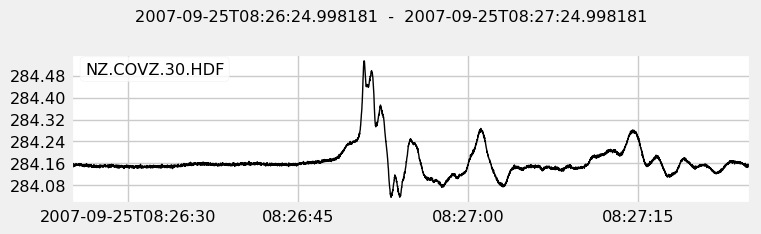

In [13]:
tr2007.plot()

In [213]:
#get 2007 data
getwave(date2007, pre, post, net, sta, loc, cmp)
st2007 = st.detrend() #detrend to remove dc component
st2007.remove_sensitivity()
tr2007 = st2007[0]

#trim to exact
t = UTCDateTime(date2007)
tr2007.trim(t-pre, t+post)

arc client successful


/home/ruma/anaconda3/lib/python3.6/site-packages/obspy/signal/detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


NZ.COVZ.30.HDF | 2007-09-25T08:26:24.998181Z - 2007-09-25T08:27:24.998181Z | 100.0 Hz, 6001 samples

**basic auto-scaled plot in units of hPa**

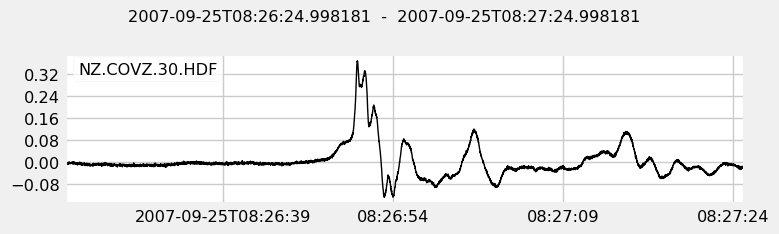

In [214]:
tr2007.plot()

**data from this eruption**

In [215]:
getwave(datenow, pre, post, net, sta, loc, cmp)
stnow = st.detrend() #detrend to remove dc component
stnow.remove_sensitivity()
trnow = stnow[0]

#trim to exact
t = UTCDateTime(datenow)
trnow.trim(t-pre, t+post)

nrt client successful


/home/ruma/anaconda3/lib/python3.6/site-packages/obspy/signal/detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


NZ.COVZ.30.HDF | 2018-06-26T02:00:46.998391Z - 2018-06-26T02:01:46.998391Z | 100.0 Hz, 6001 samples

**basic auto-scaled plot in units of hPa**

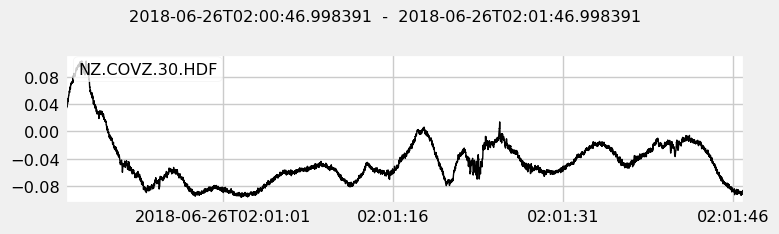

In [216]:
trnow.plot()

## Comparison Plot, as Percentage of Peak 2007 Amplitude

In [217]:
#reference value, peak amplitude of 2007 eruption signal
max2007 = tr2007.data.max()
min2007 = tr2007.data.min()
vals = np.array([-1*min2007,max2007])
reference = np.amax(vals)

In [218]:
#how big is current eruption relative to 2007?
maxnow = trnow.data.max()
minnow = trnow.data.min()
vals = np.array([-1*minnow,maxnow])
nowpeak = np.amax(vals)
#calculated as a percentage and rounded
nowpercent = int(round(nowpeak/reference*100))

**eruption amplitudes**

Peak will usually be the positive (over-pressure) value

In [219]:
print ('2007 eruption: min = ', min2007, ', max = ', max2007, ', peak = ', reference)

2007 eruption: min =  -0.12827840518597755 , max =  0.3693882214142463 , peak =  0.3693882214142463


In [220]:
print ('now eruption: min = ', min, ', max = ', max, ', peak = ', nowpeak, ', percent = ', nowpercent)

now eruption: min =  -0.09655952453613281 , max =  0.10347366333007812 , peak =  0.10347366333007812 , percent =  28


In [221]:
t2007 = np.arange(len(tr2007))
tnow = np.arange(len(trnow))

In [222]:
#format main heading based on amplitude of current eruption
if (nowpercent < 100):
    mainheader = 'Ruapehu explosion intensity was '+str(nowpercent)+'% of the 2007 eruption'
if (nowpercent == 100):
    mainheader = 'Ruapehu explosion intensity was equal to the 2007 eruption'
if (nowpercent > 100):
    exceed = newpercent - 100
    mainheader = 'Ruapehu explosion intensity was '+str(exceed)+'% larger than the 2007 eruption'

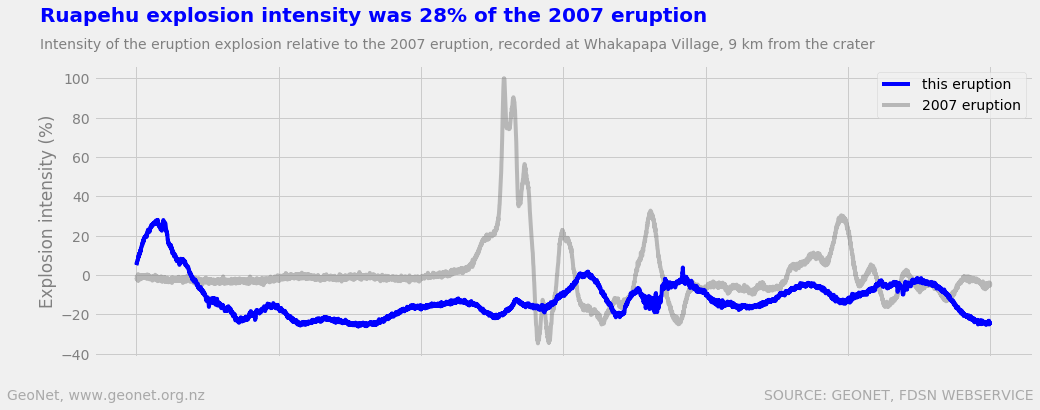

In [223]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1)

#plot waveforms, with amplitude scaled relative to reference value (2007 eruption amplitude)
ax.plot(t2007, tr2007.data/reference*100, color='grey', alpha=0.5, label='2007 eruption')
ax.plot(tnow, trnow.data/reference*100, color='blue', label='this eruption')

#turn off x-axis labels, these not needed
ax.set_xticklabels([])

ax.set_ylabel('Explosion intensity (%)', color='gray')
ax.tick_params(colors='gray')

#reverse order of labels to this eruption is first
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper right')

#titles
ax.text(x = 0.03, y = 1, transform=fig.transFigure, s=mainheader, fontsize=20, weight='semibold', color='blue')
ax.text(x = 0.03, y = 0.925, transform=fig.transFigure, s = 'Intensity of the eruption explosion relative to the 2007 eruption, recorded at Whakapapa Village, 9 km from the crater', fontsize=14, color='gray')

#signature bar
ax.text(x = 0, y = -0.05, transform=fig.transFigure, s = 'GeoNet, www.geonet.org.nz', fontsize = 14, color = 'darkgray')
ax.text(x = 0.95, y = -0.05, transform=fig.transFigure, s = 'SOURCE: GEONET, FDSN WEBSERVICE', horizontalalignment='right', fontsize = 14, color = 'darkgray');

In [224]:
#output a png
fig.savefig('explosion.png')